### Scientific Python

In [1]:
x = [1, 2, 3]
y = [4, 9, 16]
print(x+y)

[1, 2, 3, 4, 9, 16]


### Numpy

In [2]:
import numpy

In [3]:
x_numpy = numpy.array(x)
y_numpy = numpy.array(y)
print(x_numpy + y_numpy)
print(x_numpy[0])
print(y_numpy[1:])

[ 5 11 19]
1
[ 9 16]


In [4]:
print(3*x_numpy)
print(numpy.log(x_numpy))
print(x_numpy*y_numpy)
print((x_numpy-1)**2)

[3 6 9]
[0.         0.69314718 1.09861229]
[ 4 18 48]
[0 1 4]


In [5]:
A_numpy = numpy.array([ [1, 2, 3], [4, 5, 6], [7, 8, 0]])
print(A_numpy**2)

[[ 1  4  9]
 [16 25 36]
 [49 64  0]]


In [6]:
x_squared = numpy.dot(x_numpy, x_numpy)
A_times_x = numpy.dot(A_numpy, x_numpy)
print(x_squared)
print(A_times_x)

14
[14 32 23]


In [7]:
print(x_numpy.size)
print(x_numpy.shape)
print(A_numpy.size)
print(A_numpy.shape)

3
(3,)
9
(3, 3)


#### Linear Algebra

In [8]:
from scipy import linalg

In [9]:
print(linalg.solve(A_numpy, x_numpy))
print(linalg.det(A_numpy))

[-3.33333333e-01  6.66666667e-01 -3.52451754e-18]
27.0


#### Working with files

In [10]:
numpy.savetxt('data/A_numpy.txt', A_numpy)

In [11]:
!cat A_numpy.txt

cat: A_numpy.txt: No such file or directory


In [12]:
A_from_file = numpy.loadtxt('data/A_numpy.txt')
print(A_from_file == A_numpy)

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


### Plotting

In [13]:
from matplotlib import pyplot

In [14]:
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize']=(12,9)

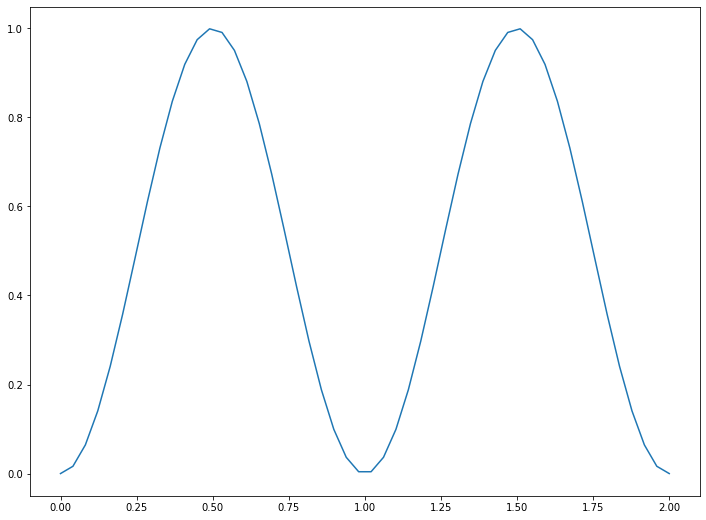

In [15]:
x = numpy.linspace(0, 2.0)
y = numpy.sin(numpy.pi*x)**2
pyplot.plot(x, y)
pyplot.show()

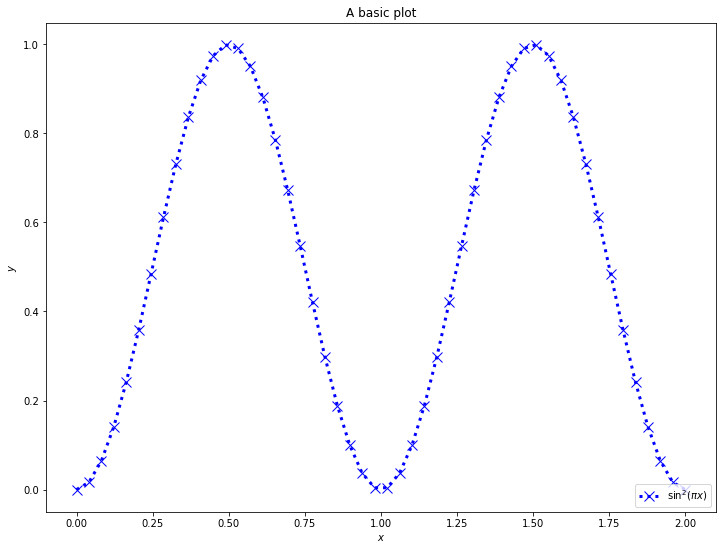

In [16]:
x = numpy.linspace(0, 2.0)
y = numpy.sin(numpy.pi*x)**2

pyplot.plot(x, y, 
            marker='x', 
            markersize=10, 
            linestyle=':', 
            linewidth=3,
            color='b', 
            label=r'$\sin^2(\pi x)$')

pyplot.legend(loc='lower right')
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$y$')
pyplot.title('A basic plot')
pyplot.show()

#### Saving figures

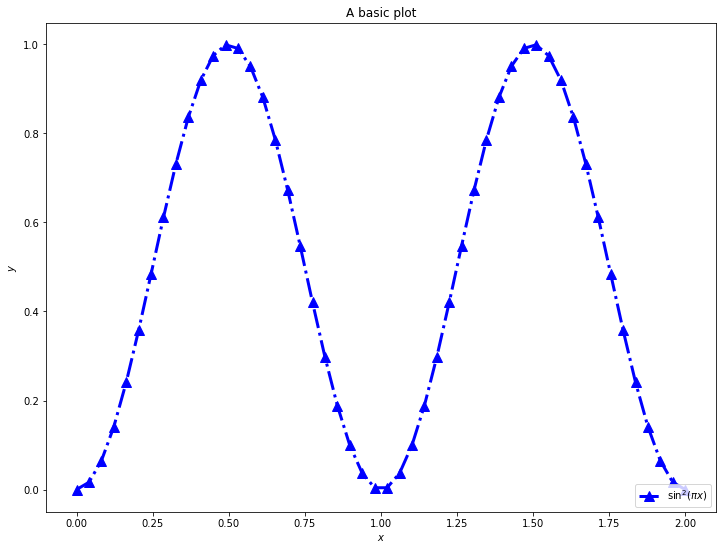

In [17]:
x = numpy.linspace(0, 2.0)
y = numpy.sin(numpy.pi*x)**2

pyplot.plot(x, y, 
            marker='^', 
            markersize=10, 
            linestyle='-.', 
            linewidth=3,
            color='b', 
            label=r'$\sin^2(\pi x)$')

pyplot.legend(loc='lower right')
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$y$')
pyplot.title('A basic plot')
pyplot.savefig('data/simple_plot.png')

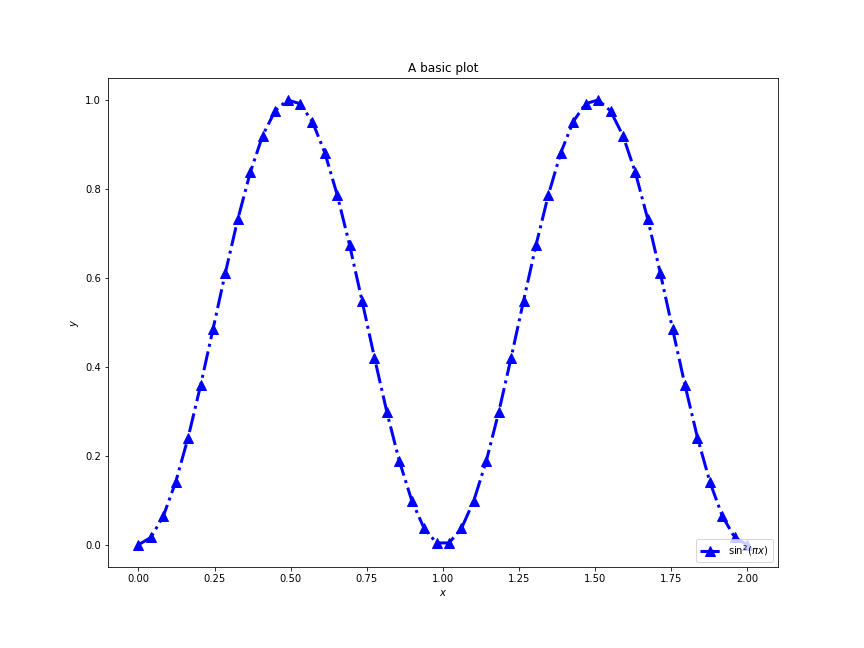

In [18]:
from IPython.display import Image
Image('data/simple_plot.png')

#### Object-based approach

In [19]:
fig = pyplot.figure(figsize=(12, 9))

<Figure size 864x648 with 0 Axes>

In [20]:
axis1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height
axis2 = fig.add_axes([0.4, 0.7, 0.2, 0.15])

In [21]:
axis1.plot(x, y)
axis2.plot(x, y)

In [22]:
axis2.set_xbound(0.7, 0.8)
axis2.set_ybound(0.3, 0.7)

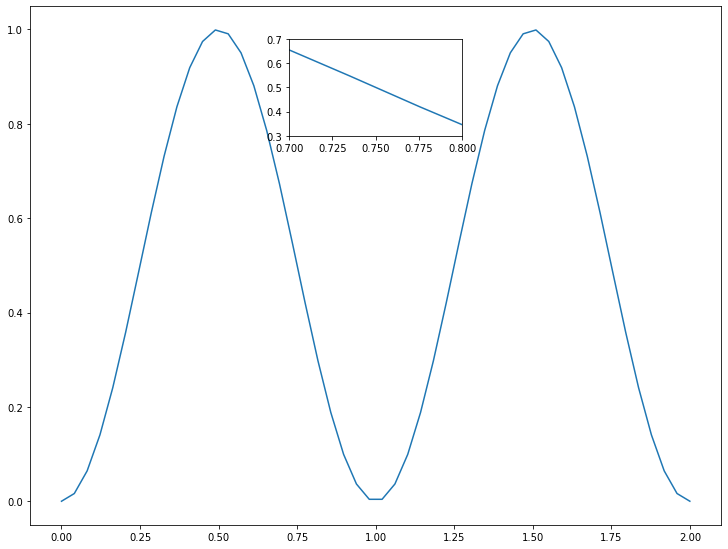

In [23]:
fig

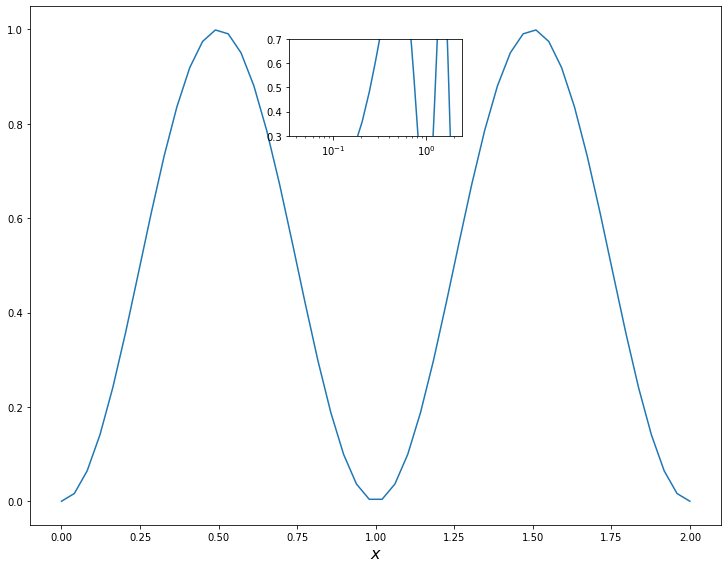

In [24]:
axis2.set_xscale('log')
axis1.set_xlabel(r'$x$', fontsize=16)
fig

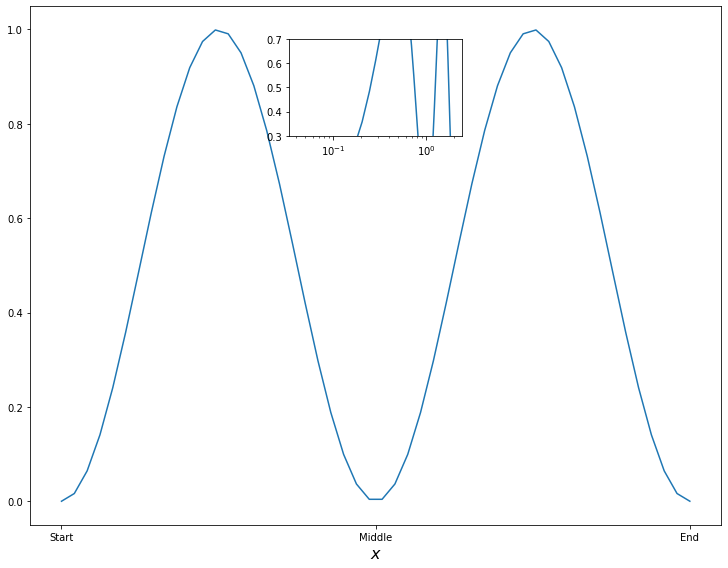

In [25]:
axis1.set_xticks([0, 1, 2])
axis1.set_xticklabels(['Start', 'Middle', 'End'])
fig

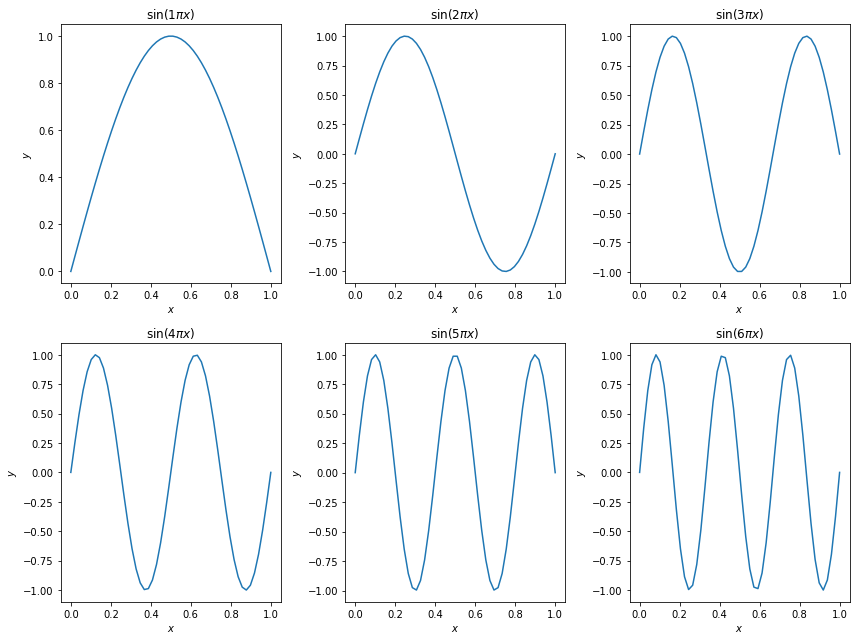

In [26]:
fig = pyplot.figure(figsize=(12, 9))
x = numpy.linspace(0.0, 1.0)

for subplot in range(1, 7):
    axis = fig.add_subplot(2, 3, subplot)
    axis.plot(x, numpy.sin(numpy.pi*x*subplot))
    axis.set_xlabel(r'$x$')
    axis.set_ylabel(r'$y$')
    axis.set_title(r'$\sin({} \pi x)$'.format(subplot))

fig.tight_layout();

#### Higher dimensions

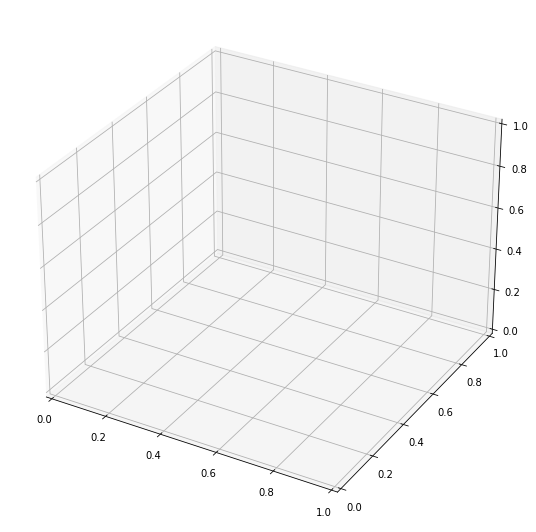

In [27]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = pyplot.figure(figsize=(12, 9))
axis = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection='3d')

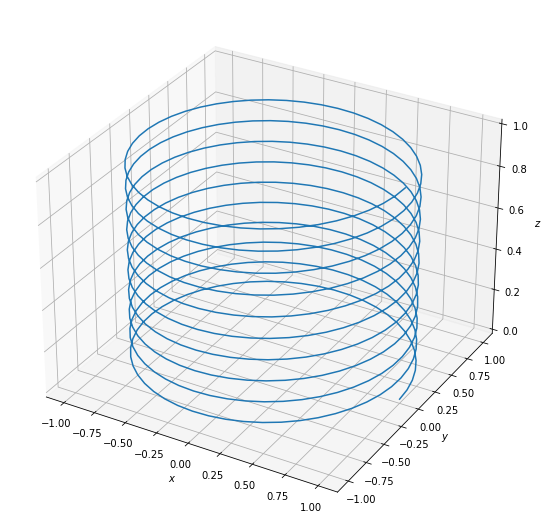

In [28]:
t = numpy.linspace(0.0, 10.0, 500)
x = numpy.cos(2.0*numpy.pi*t)
y = numpy.sin(2.0*numpy.pi*t)
z = 0.1*t

axis.plot(x, y, z)
axis.set_xlabel(r'$x$')
axis.set_ylabel(r'$y$')
axis.set_zlabel(r'$z$')
fig

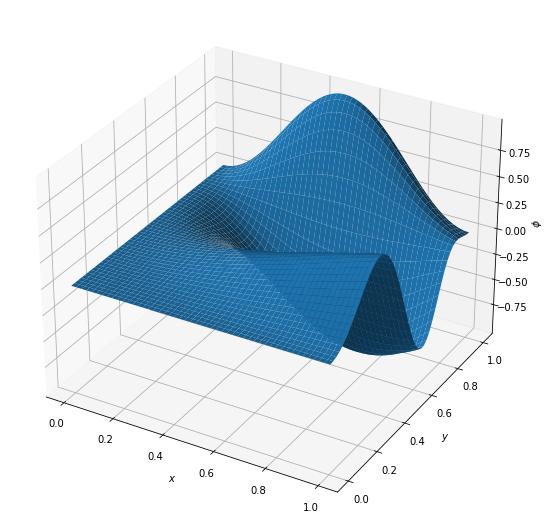

In [29]:
fig = pyplot.figure(figsize=(12, 9))
axis = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection='3d')

x = numpy.linspace(0.0, 1.0)
y = numpy.linspace(0.0, 1.0)

X, Y = numpy.meshgrid(x, y)
# x, y are vectors
# X, Y are 2d arrays

phi = numpy.sin(numpy.pi*X*Y)**2 * numpy.cos(2.0*numpy.pi*Y**2)

axis.plot_surface(X, Y, phi)
axis.set_xlabel(r'$x$')
axis.set_ylabel(r'$y$')
axis.set_zlabel(r'$\phi$');

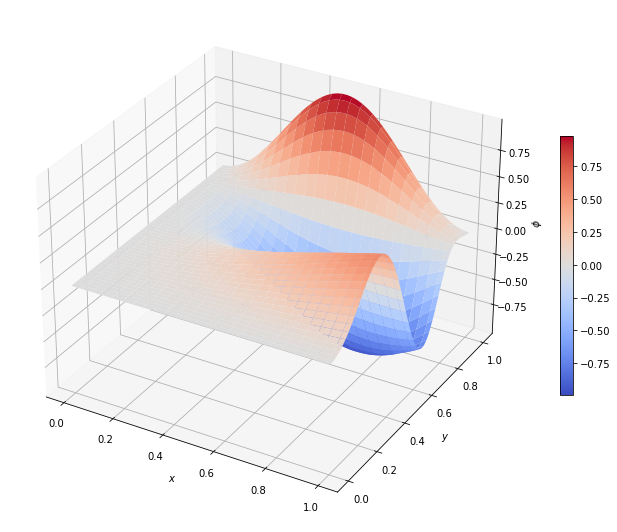

In [30]:
from matplotlib import cm

fig = pyplot.figure(figsize=(12, 9))
axis = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection='3d')

p = axis.plot_surface(X, Y, phi, rstride=1, cstride=2, cmap = cm.coolwarm)
axis.set_xlabel(r'$x$')
axis.set_ylabel(r'$y$')
axis.set_zlabel(r'$\phi$')
fig.colorbar(p, shrink=0.5);

### Scipy

#### Integration

In [31]:
from numpy import sin
from scipy.integrate import quad

def integrand(x):
    
    """
    The integrand \sin^2(x).
    Parameters
    ----------
    x : real (list)
    The point(s) at which the integrand is evaluated
    Returns
    -------
    integrand : real (list)
    The integrand evaluated at x
    """
    
    return sin(x)**2

result = quad(integrand, 0.0, numpy.pi)
print("The result is {}.".format(result))

The result is (1.5707963267948966, 1.743934249004316e-14).


In [32]:
from numpy import sin
from scipy.integrate import quad

def integrand_param(x, a):
    
    """
    The integrand \sin^2(a x).
    Parameters
    ----------
    x : real (list)
    The point(s) at which the integrand is evaluated
    a : real
    The parameter for the integrand
    Returns
    -------
    integrand : real (list)
    The integrand evaluated at x
    """
    
    return sin(a*x)**2

for a in range(1, 6):
    result, accuracy = quad(integrand_param, 0.0, numpy.pi, args=(a,))
    print("For a={}, the result is {}.".format(a, result))

For a=1, the result is 1.5707963267948966.
For a=2, the result is 1.5707963267948966.
For a=3, the result is 1.5707963267948966.
For a=4, the result is 1.5707963267948966.
For a=5, the result is 1.5707963267948968.


In [33]:
from numpy import sin
from scipy.integrate import quad

def integrand_param2(x, a, b):
    
    """
    The integrand \sin^2(a x + b).
    Parameters
    ----------
    x : real (list)
    The point(s) at which the integrand is evaluated
    a : real
    The parameter for the integrand
    b : real
    The second parameter for the integrand
    Returns
    -------
    integrand : real (list)
    The integrand evaluated at x
    """
    
    return sin(a*x+b)**2

for a in range(1, 3):
    for b in range(3):
        result, accuracy = quad(integrand_param2, 0.0, numpy.pi, args=(a, b))
        print("For a={}, b={}, the result is {}.".format(a, b, result))

For a=1, b=0, the result is 1.5707963267948966.
For a=1, b=1, the result is 1.570796326794897.
For a=1, b=2, the result is 1.570796326794897.
For a=2, b=0, the result is 1.5707963267948966.
For a=2, b=1, the result is 1.5707963267948961.
For a=2, b=2, the result is 1.5707963267948961.


#### Solving ODEs

In [34]:
from numpy import exp
from scipy.integrate import odeint

def dydt(y, t):
    
    """
    Defining the ODE dy/dt = e^{-t} - y.
    Parameters
    ----------
    y : real
    The value of y at time t (the current numerical approximation)
    t : real
    The current time t
    Returns
    -------
    dydt : real
    The RHS function defining the ODE.
    """
    
    return exp(-t) - y

t = numpy.linspace(0.0, 1.0)
y0 = [1.0]

y = odeint(dydt, y0, t)
print("The shape of the result is {}.".format(y.shape))
print("The value of y at t=1 is {}.".format(y[-1,0]))

The shape of the result is (50, 1).
The value of y at t=1 is 0.73575886292927.


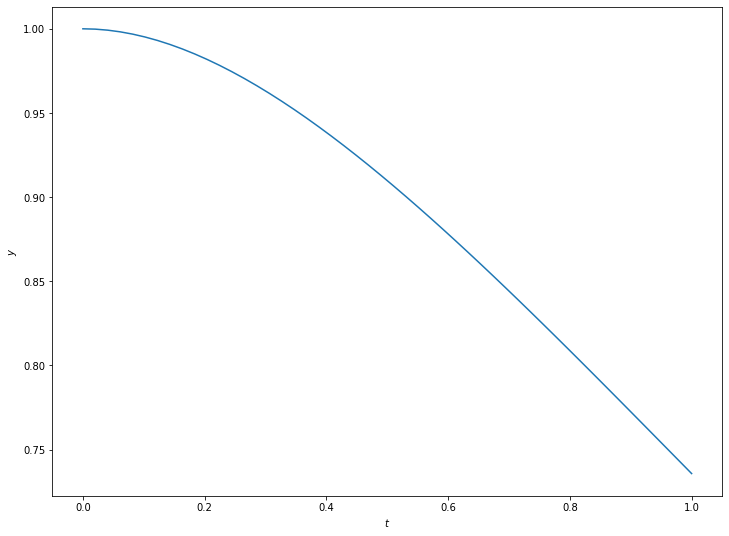

In [35]:
pyplot.plot(t, y[:,0])
pyplot.xlabel(r'$t$')
pyplot.ylabel(r'$y$')
pyplot.show()

In [36]:
import numpy
from scipy.integrate import odeint

def dzdt(z, t, alpha):
    
    """
    Defining the ODE dz/dt.
    Parameters
    ----------
    z : real, list
    The value of z at time t (the current numerical approximation)
    t : real
    The current time t
    alpha : real
    Parameter
    Returns
    -------
    dzdt : real
    The RHS function defining the ODE.
    """
    
    dzdt = numpy.zeros_like(z)
    x, y = z
    dzdt[0] = -y + alpha
    dzdt[1] = x
    
    return dzdt

In [37]:
t = numpy.linspace(0.0, 50.0, 1000)
z0 = [1.0, 0.0]
alpha = 1e-5

z = odeint(dzdt, z0, t, args=(alpha,))

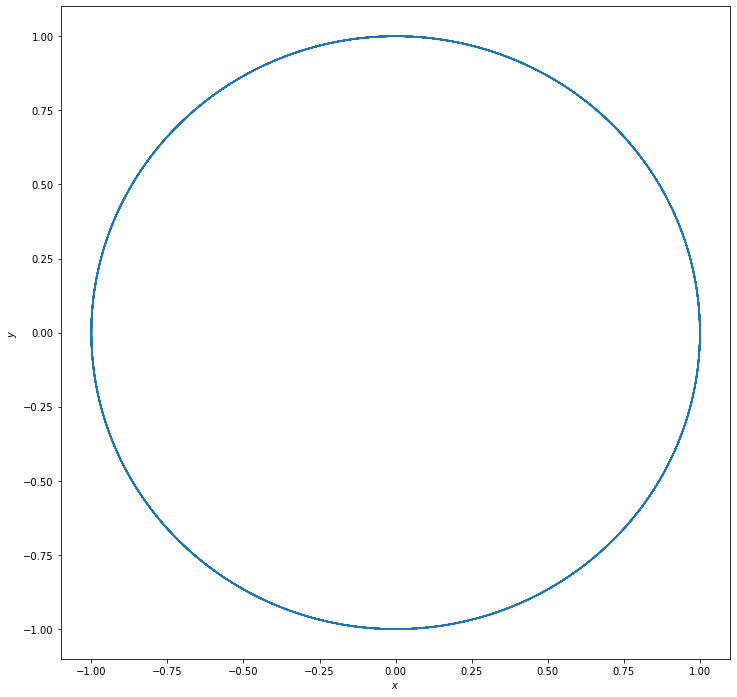

In [38]:
fig = pyplot.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)
ax.plot(z[:,0], z[:,1])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1);

### Exercise: Lorenz attractor

### Exercise: Mandelbrot

### Exercise: The shortest published Mathematical paper

In [39]:
%reload_ext watermark
%watermark -a "Caique Miranda" -gu "caiquemiranda" -iv

Author: Caique Miranda

Github username: caiquemiranda

scipy     : 1.8.1
sys       : 3.10.5 (tags/v3.10.5:f377153, Jun  6 2022, 16:14:13) [MSC v.1929 64 bit (AMD64)]
matplotlib: 3.5.2
numpy     : 1.23.0



### End.